In [196]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

stop = nltk.corpus.stopwords.words('english')
stop2 = "It","wine","The","This", "A","It's"

In [55]:
reviews = pd.read_csv('data/winereviewscsv.csv', index_col=0)
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


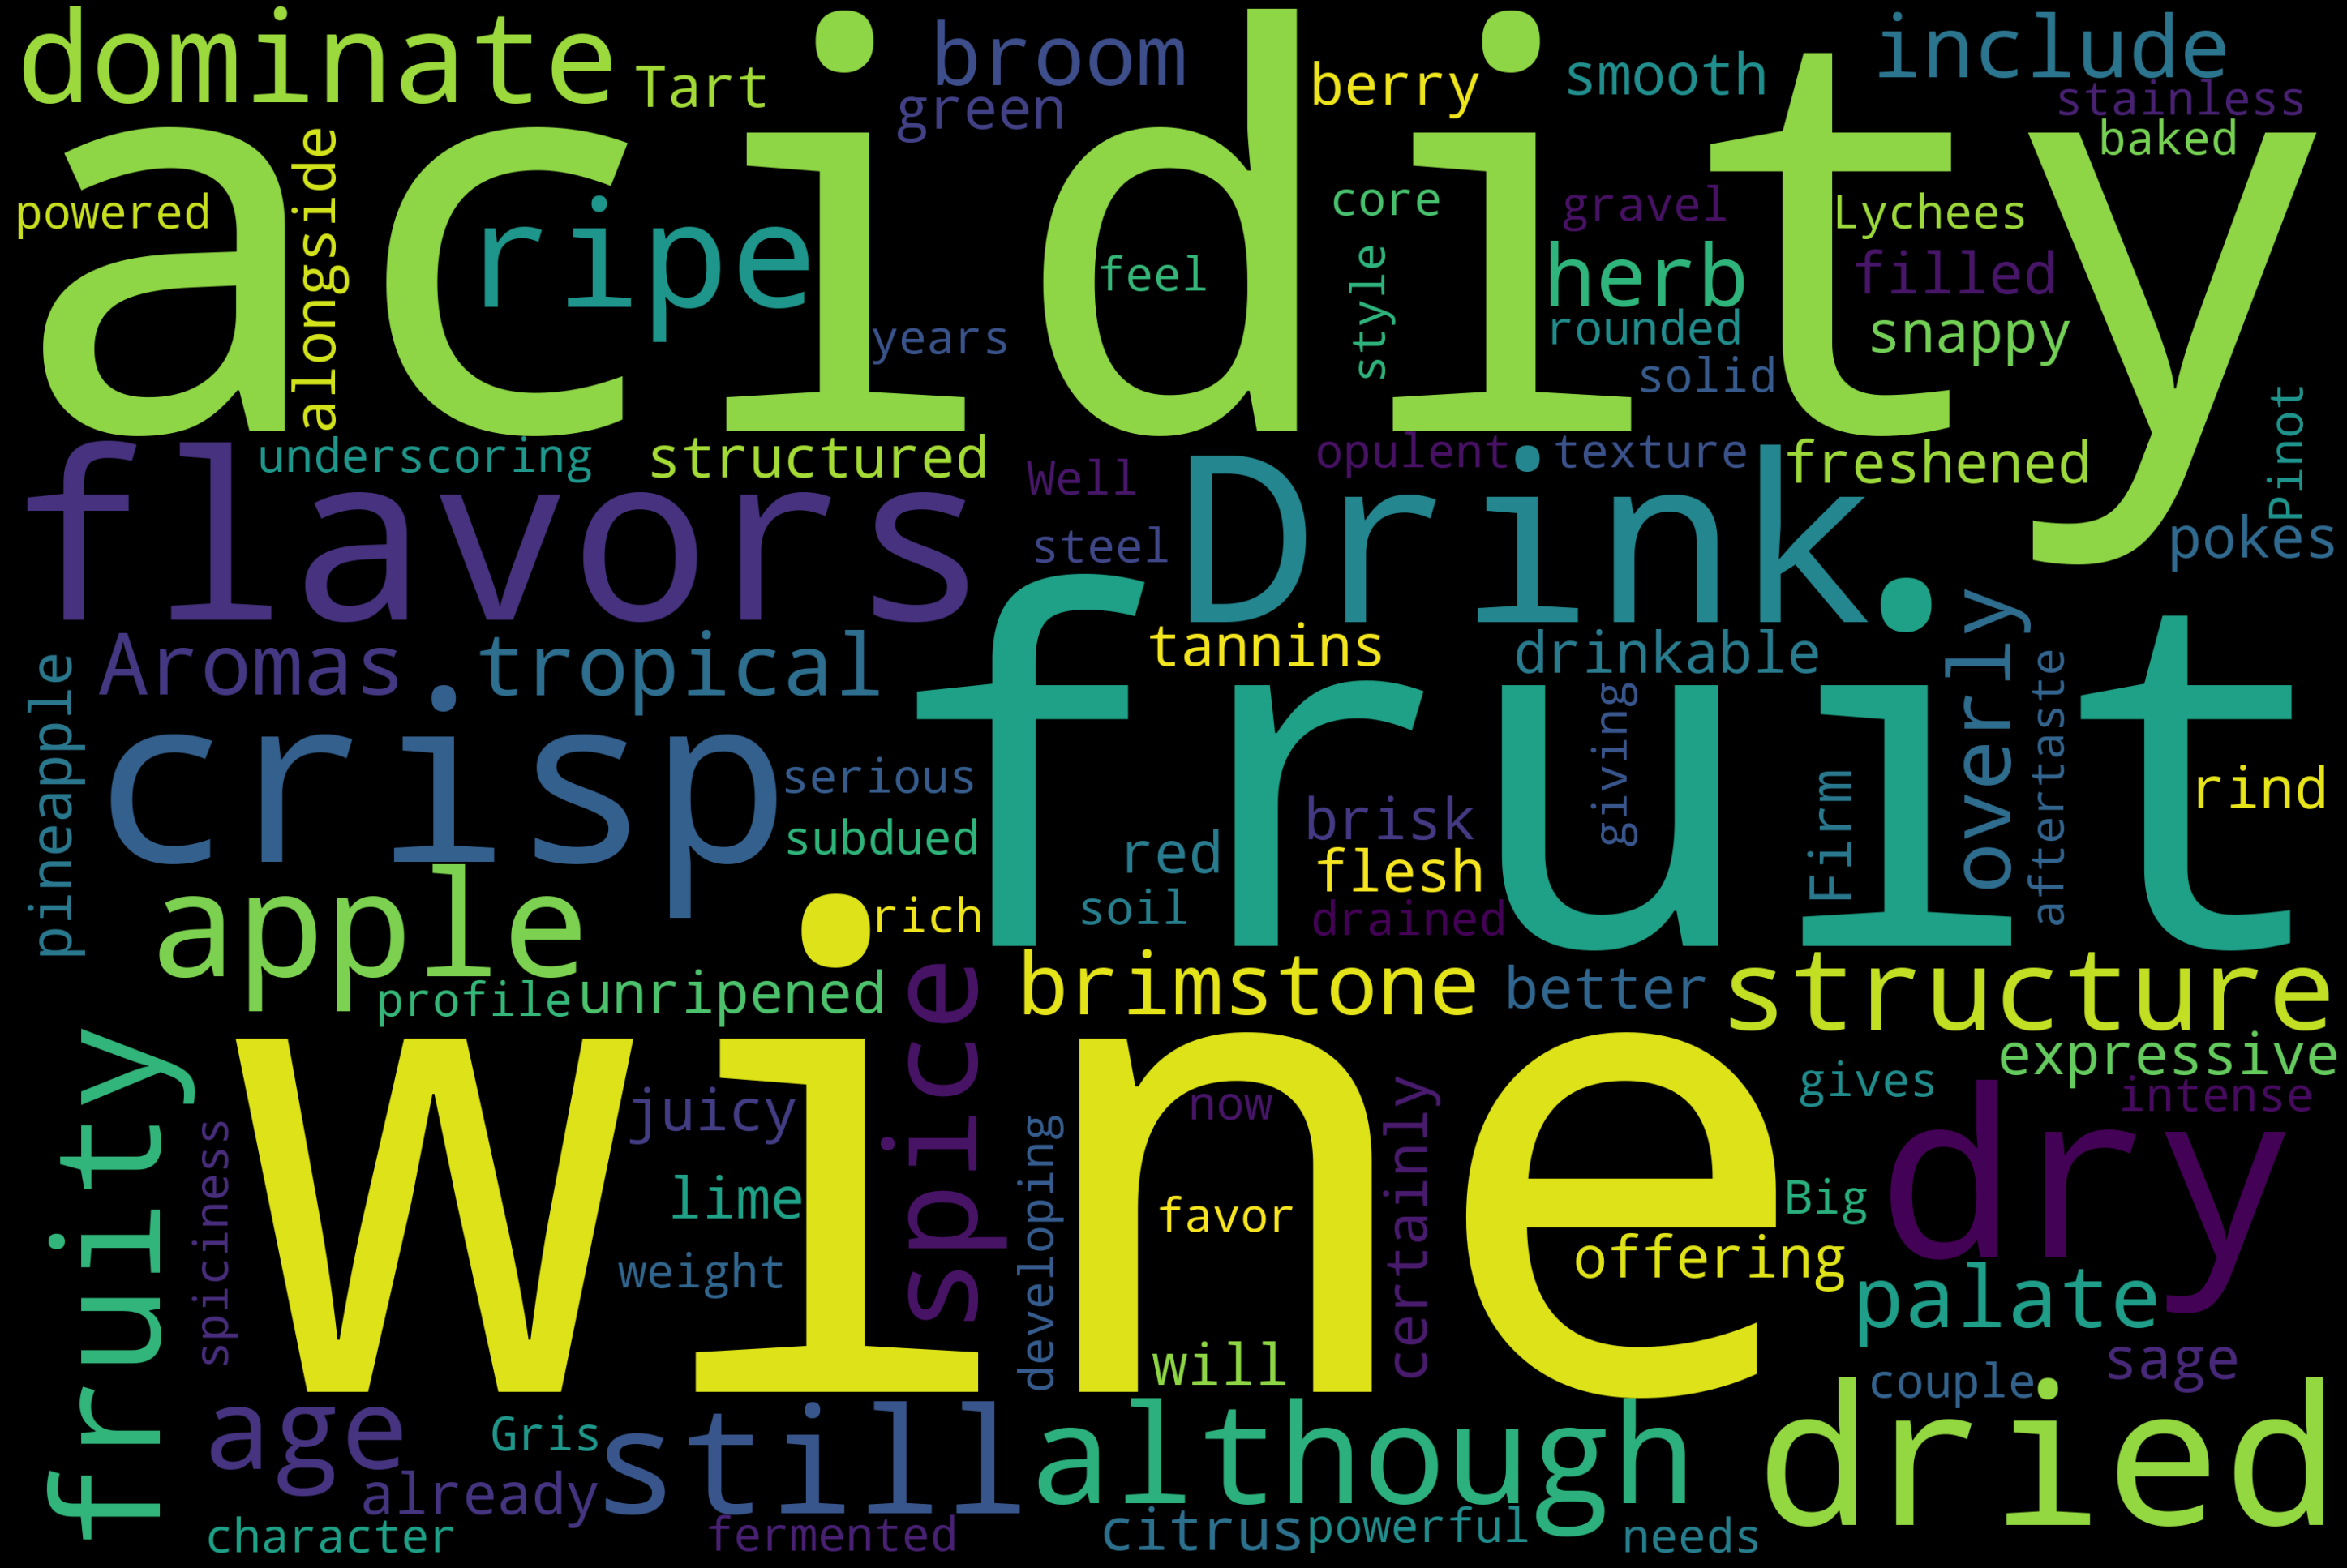

In [197]:
text = reviews.description.values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [198]:
a = reviews["description"]
values = ",".join(map(str,a))

In [204]:
filtered_words = [word for word in re.split("[\ \,\.]+", values) if word not in stop if word not in stop2]
counted_words = collections.Counter(filtered_words)

words = []
counts = []

for letter, count in counted_words.most_common(20):
    words.append(letter.lower())
    counts.append(count)

['flavors', 'fruit', 'palate', 'aromas', 'finish', 'acidity', 'tannins', 'cherry', 'ripe', 'black', 'drink', 'notes', 'spice', 'red', 'nose', 'oak', 'rich', 'fresh', 'berry', 'dry']


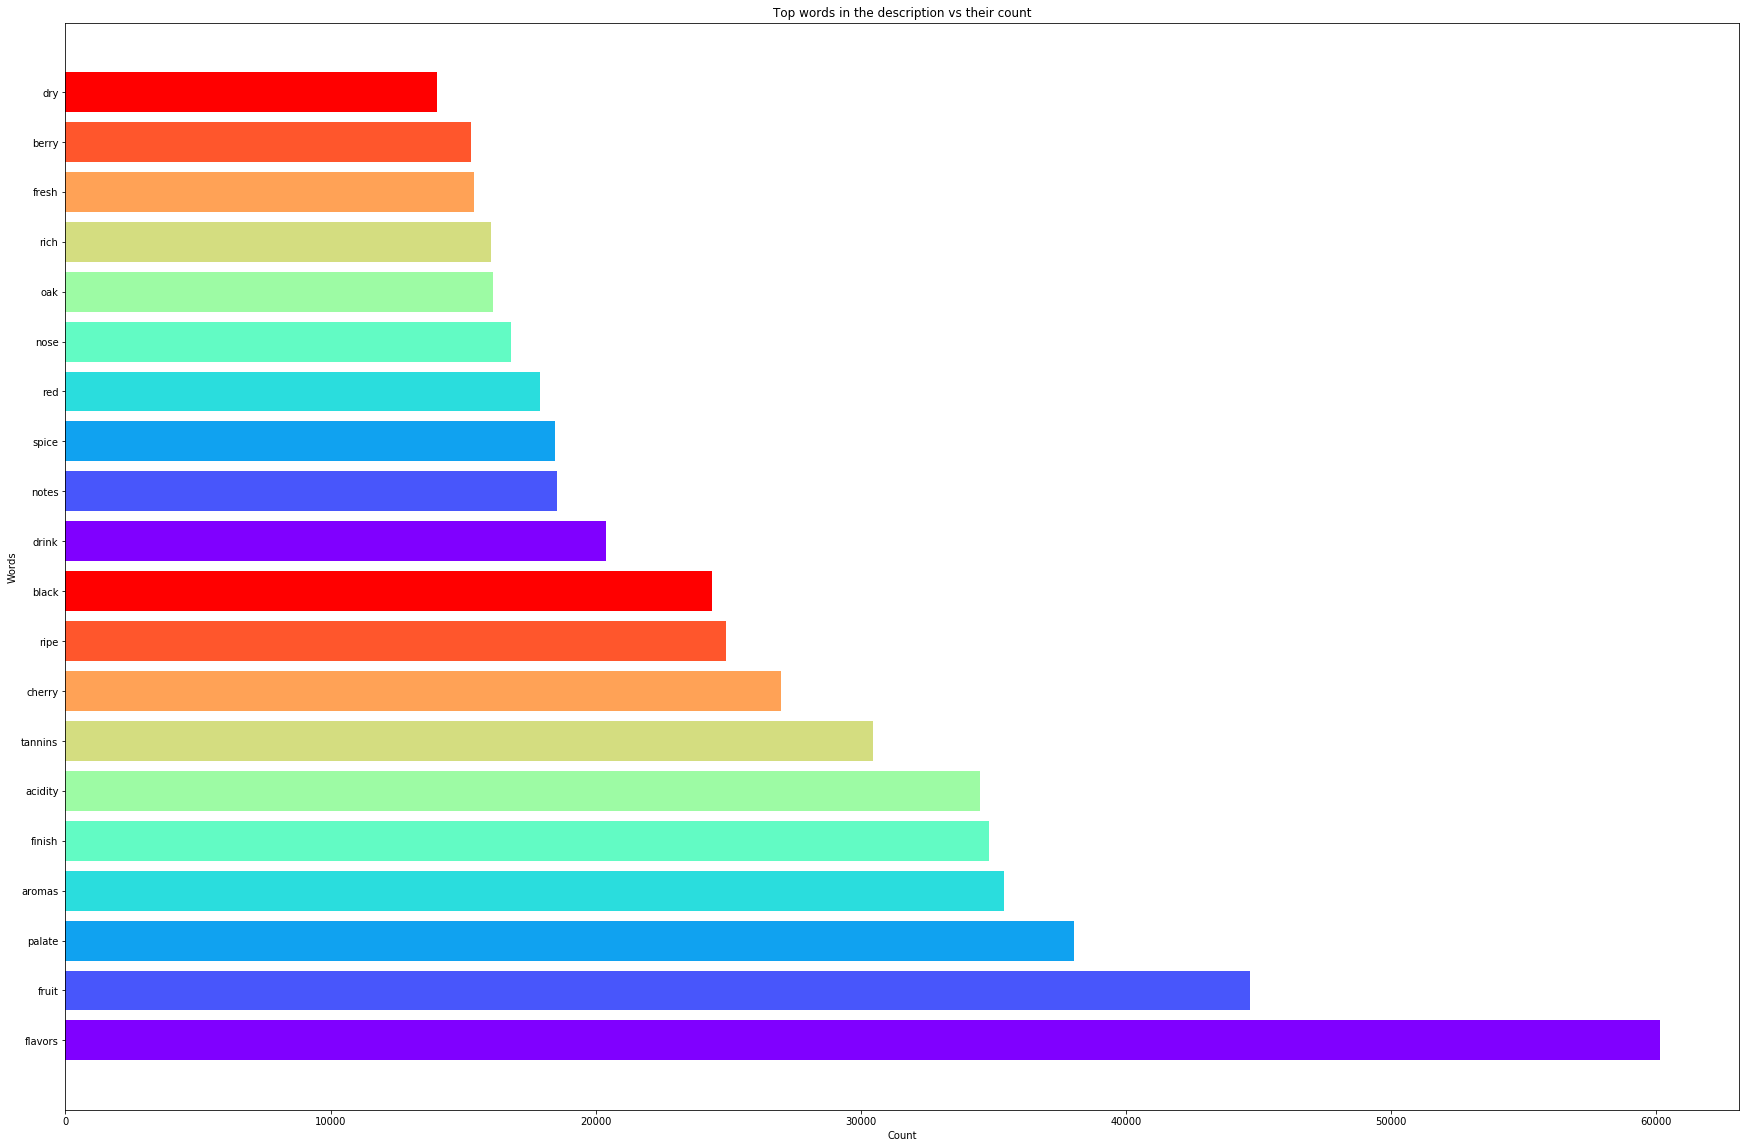

In [205]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 30, 20

plt.title('Top words in the description vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
print(words)

# Sudarome naujus stulpelius

In [206]:
# array of dict.
all_hits_words = []
for description in reviews.description.values:
    hits_words = {}
    _description = re.split("[ \.\,]", description)

    for word in words:
        hit = 0
        if word in _description:
            hit = 1

        # build columns for one review.
        hits_words[ word ] = hit

    # build rows of columns of word hits.
    all_hits_words.append(hits_words)

# "Ištraukiame" metus iš 'title'

In [207]:
# extract year from each review's title.
title_years = []
for title in reviews.title.values:
    year = 0

    m = re.search("(\d{4})", title)
    if m:
        # set year to be the first match of 4 digits, and convert to integer.
        year = int(m.group(1))

    review = {}
    review['year'] = year
    # build the column.
    title_years.append( review )

# Supdarome naują DataFrame

    1 - nuo 80 iki 84 taškų (Žemiau nei vidutiniai vynai)
    2 - nuo 84 iki 88 taškų (Vidutiniai vynai)
    3 - nuo 88 iki 92 taškų (Geri vynai)
    4 - nuo 92 iki 96 taškų (labai geri vynai)
    5 - nuo 96 iki 100 taškų (Puikūs vynai)

In [208]:
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

NameError: name 'dp' is not defined

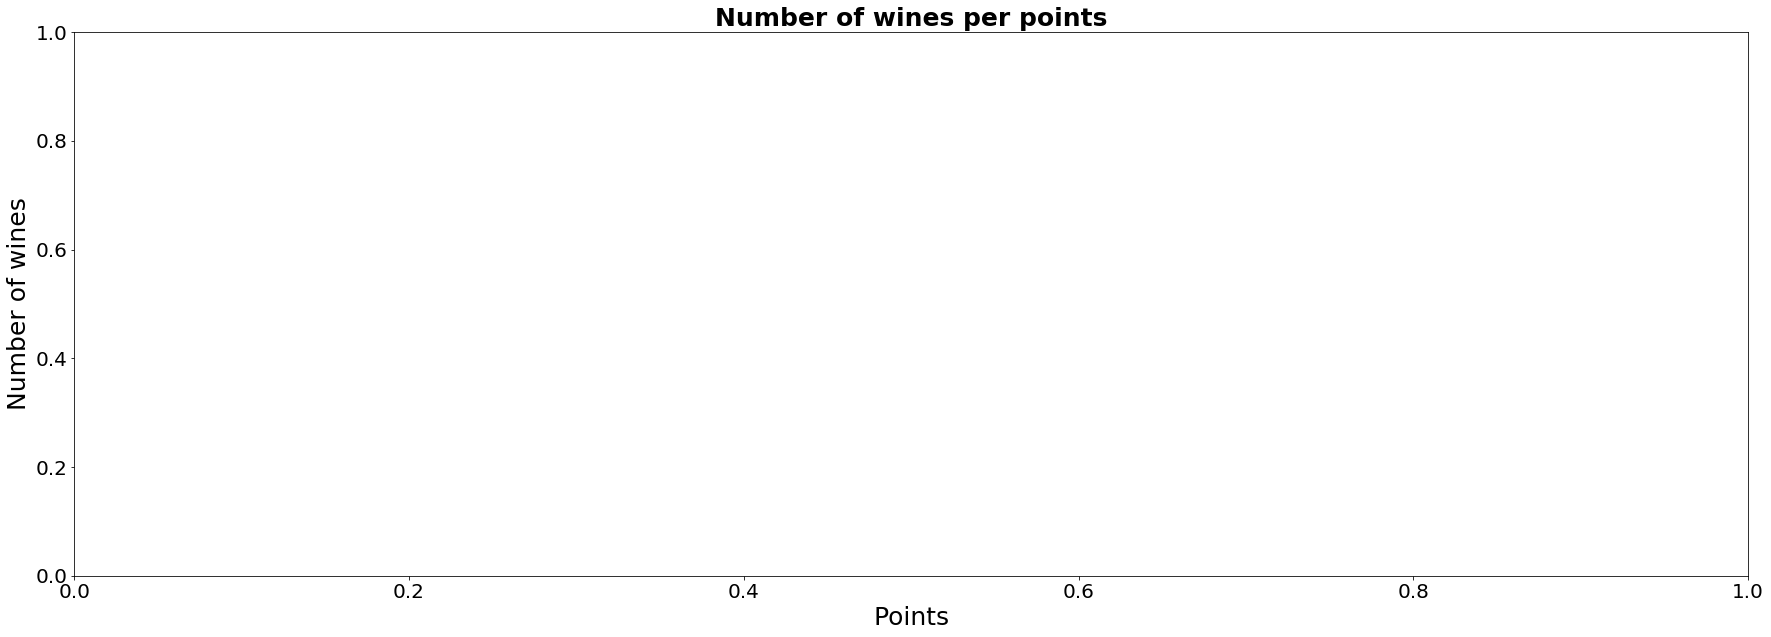

In [215]:
final_reviews = pd.DataFrame()

final_reviews["country"] = reviews["country"]
final_reviews["points"] = reviews["points"].apply(transform_points_simplified)
final_reviews["province"] = reviews["province"]
final_reviews["region"] = reviews["region_1"]
final_reviews["variety"] = reviews["variety"]
# oneliner to extract value by key name "year" from dictionary title_years.
final_reviews["year"] = [r['year'] for r in title_years]
for word in words:
    final_reviews[word] = [r[word] for r in all_hits_words]
#print(final_reviews.describe())



In [230]:
def do_predict(model,description):
    score = model.predict(prepare_review_predict_data(description))
    print("Description: %-50s" % (description))
    print("Predicted score: %d" % (score))
    print("")
    return

#####
# function: preview_review_predict_data
#  input: description
# output: ...
def prepare_review_predict_data(description):
    equivalent_words = {
        'fruit': 'fruity'
    }
    # process:
    description_words = re.split("[ \.\,]", description)
    predict_data = []
    for word in words:
        hit = 0
        if word in description_words:
            hit = 1
        if word in equivalent_words and equivalent_words[word] in description_words:
            hit = 1

        predict_data.append(hit)
        
    # output:
    return np.array([predict_data])
        
def do_model(name,X_train,X_validation,Y_train,Y_validation):
    model = None
    if "LinearRegression" == name:
        model = LinearRegression()
    if "LogisticRegression" == name:
        model = LogisticRegression()
        Y_validation = Y_validation.astype(int)
        Y_train = Y_train.astype(int)
    if "SGD" == name:
        model = SGDClassifier()
        Y_validation = Y_validation.astype(int)
        Y_train = Y_train.astype(int)
    if "SGDRegressor" == name:
        model = SGDRegressor()
        Y_validation = Y_validation.astype(int)
        Y_train = Y_train.astype(int)
    if "rfr" == name:
        model = RandomForestRegressor()
    
    model.fit(X_train, Y_train)

    print("model: %s" % (name))
    predictions_model = model.predict(X_validation)

    print('Model Prediction Hit rate = {0:.02%}'.format(
    (Y_validation == np.round(predictions_model)).mean()))
    
    return model

def do_model_cv(name,X,Y):
    model = None
    if "LinearRegression" == name:
        model = LinearRegression()
    if "SGD" == name:
        model = SGDClassifier()
        Y = Y.astype(int)
    if "SGDRegressor" == name:
        model = SGDRegressor()
        Y = Y.astype(int)
    if "rfr" == name:
        model = RandomForestRegressor()

    score = cross_val_score(model, X, Y, cv=10)
    print("Model Name: %s" % (name))
    print(score)
    print(np.mean(score))

    return

# Split-out validation dataset
val = final_reviews.values
X = val[:,6:]  # words.
y = val[:,1]    # points.
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


model = do_model("LinearRegression",X_train,X_validation,Y_train,Y_validation)
#do_predict(model, "This wine was very smooth, fruity, ripe ")

model = do_model("LogisticRegression",X_train,X_validation,Y_train,Y_validation)

model = do_model("SGD",X_train,X_validation,Y_train,Y_validation)
##do_predict(model, "This wine was very smooth, fruity, ripe ")

model = do_model("rfr",X_train,X_validation,Y_train,Y_validation)
model = do_model("SGDRegressor",X_train,X_validation,Y_train,Y_validation)
###do_model_cv("SGDRegressor",X,y)

model: LinearRegression
Model Prediction Hit rate = 45.02%


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


model: LogisticRegression
Model Prediction Hit rate = 46.37%
model: SGD
Model Prediction Hit rate = 44.31%


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model: rfr
Model Prediction Hit rate = 45.71%
model: SGDRegressor
Model Prediction Hit rate = 45.22%
model: Gaussian
Model Prediction Hit rate = 31.48%
